In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import datetime
%matplotlib inline

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [3]:
bank_stocks = pd.read_pickle('all_banks')

In [4]:
bank_stocks

Bank Ticker    BAC                                      C                  \
Stock Info    Open   High    Low  Close    Volume    Open    High     Low   
Date                                                                        
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.00  493.80  481.10   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.60  491.00  483.50   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.40  487.80  484.00   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.80  489.00  482.00   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.00  487.40  483.00   
...            ...    ...    ...    ...       ...     ...     ...     ...   
2015-12-24   17.32  17.38  17.22  17.27  29373415   52.48   52.97   52.45   
2015-12-28   17.22  17.23  16.98  17.13  41777497   52.57   52.57   51.96   
2015-12-29   17.25  17.35  17.16  17.28  45670376   52.76   53.22   52.74   
2015-12-30   17.20  17.24  17.04  17.05  35066378   52.84   52.94   52.25   
2015-12-31   17.01  17.07  16.83  16.83  47152968   52.07   52.39   51.75   

Bank Ticker                    ...     MS                                \
Stock Info    Close    Volume  ...   Open   High    Low  Close   Volume   
Date                           ...                                        
2006-01-03   492.90   1537660  ...  57.17  58.49  56.74  58.31  5377000   
2006-01-04   483.80   1871020  ...  58.70  59.28  58.35  58.35  7977800   
2006-01-05   486.20   1143160  ...  58.55  58.59  58.02  58.51  5778000   
2006-01-06   486.20   1370250  ...  58.77  58.85  58.05  58.57  6889800   
2006-01-09   483.90   1680740  ...  58.63  59.29  58.62  59.19  4144500   
...             ...       ...  ...    ...    ...    ...    ...      ...   
2015-12-24    52.71   4671254  ...  32.57  32.71  32.44  32.48  2798163   
2015-12-28    52.38   8761743  ...  32.36  32.36  31.95  32.17  5420280   
2015-12-29    52.98  10155134  ...  32.44  32.70  32.32  32.55  6388244   
2015-12-30    52.30   8763337  ...  32.50  32.64  32.20  32.23  5057162   
2015-12-31    51.75  11281771  ...  31.91  32.30  31.77  31.81  8154307   

Bank Ticker    WFC                                 
Stock Info    Open   High    Low  Close    Volume  
Date                                               
2006-01-03   31.60  31.98  31.20  31.90  11016400  
2006-01-04   31.80  31.82  31.36  31.53  10871000  
2006-01-05   31.50  31.56  31.31  31.50  10158000  
2006-01-06   31.58  31.78  31.38  31.68   8403800  
2006-01-09   31.68  31.82  31.56  31.68   5619600  
...            ...    ...    ...    ...       ...  
2015-12-24   54.97  55.09  54.71  54.82   4999417  
2015-12-28   54.55  54.78  54.17  54.68   8288841  
2015-12-29   55.11  55.35  54.99  55.29   7894876  
2015-12-30   55.27  55.31  54.79  54.89   8016893  
2015-12-31   54.51  54.95  54.22  54.36  10929767  

[2517 rows x 30 columns]

In [5]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

## Creating a returns dataframe

In [6]:
returns = pd.DataFrame()

In [7]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [8]:
for tick in tickers:
  returns[tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()

In [9]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


## Creating plots to observe correlation for the data

'\nIt can be oberseved that the graphs for Citi Group\nappear to be different compared to others, it is\nbecause Citi group had a huge stock crash in 2008\n'

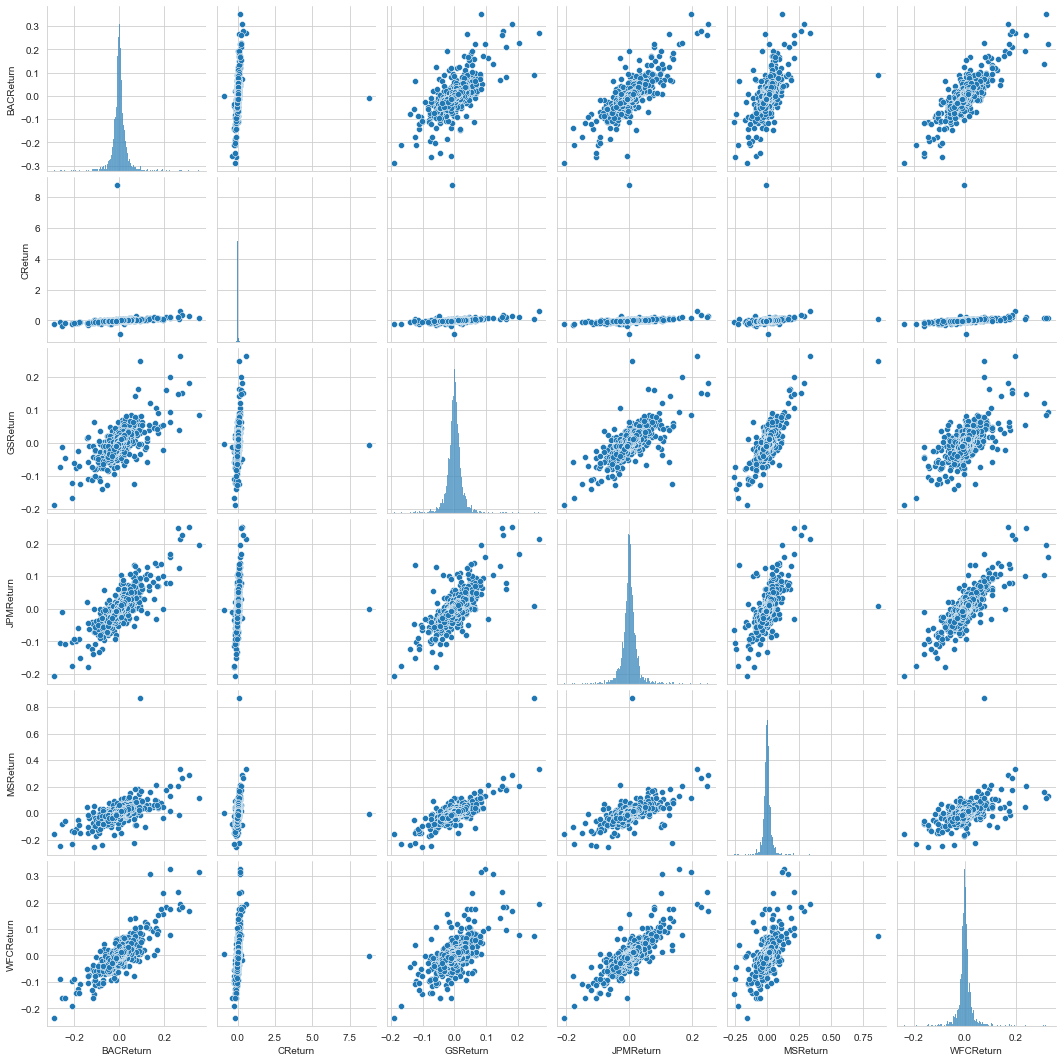

In [10]:
sns.pairplot(returns[1:])
'''
It can be oberseved that the graphs for Citi Group
appear to be different compared to others, it is
because Citi group had a huge stock crash in 2008
'''

## Performing various functions on returns

In [11]:
returns.min()

BACReturn   -0.289694
CReturn     -0.899107
GSReturn    -0.189596
JPMReturn   -0.207274
MSReturn    -0.258929
WFCReturn   -0.238223
dtype: float64

In [12]:
returns['BACReturn'].argmin()

766

In [13]:
returns.idxmin()
#The dates can be checked to get further context about the data

BACReturn   2009-01-20
CReturn     2011-05-06
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [14]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2011-05-09
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [15]:
returns.std()

BACReturn    0.036650
CReturn      0.179969
GSReturn     0.025346
JPMReturn    0.027656
MSReturn     0.037820
WFCReturn    0.030233
dtype: float64

In [16]:
returns.loc['2015-01-01' : '2015-12-31'].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

## Creating distribution plots to analyse variation in data

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MSReturn', ylabel='Density'>

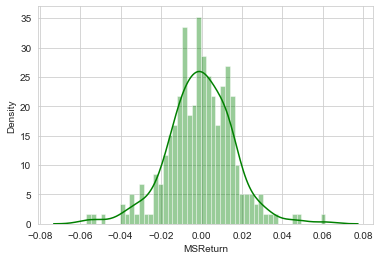

In [26]:
sns.distplot(returns.loc['2015-01-01' : '2015-12-31']['MSReturn'], color = 'green', bins = 50)
#Could use displot or histplot as alternative

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CReturn', ylabel='Density'>

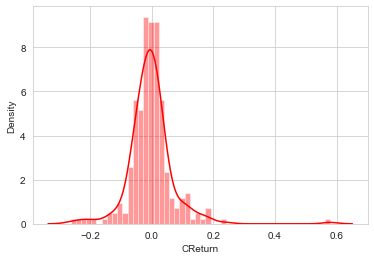

In [27]:
sns.distplot(returns.loc['2008-01-01' : '2008-12-31']['CReturn'], color = 'red', bins = 50)

## Various graphs using matplotlib, seaborn, plotly & cufflinks

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

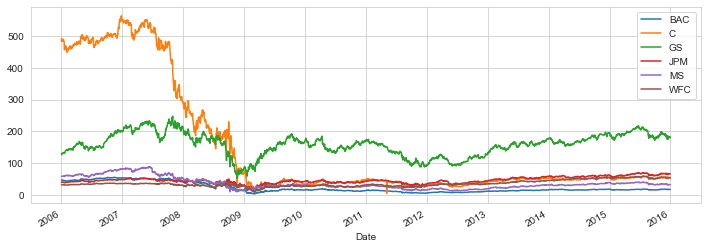

In [29]:
for tick in tickers:
  bank_stocks[tick]['Close'].plot(label = tick, figsize = (12,4))
  plt.legend()

In [30]:
bank_stocks.xs(key = 'Close', axis = 1, level = "Stock Info").iplot()

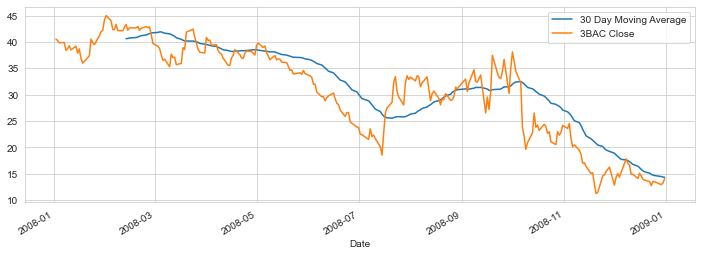

In [31]:
plt.figure(figsize = (12,4))
bank_stocks['BAC']['Close'].loc['2008-01-01' : '2009-01-01'].rolling(window=30).mean().plot(label = '30 Day Moving Average')
bank_stocks['BAC']['Close'].loc['2008-01-01' : '2009-01-01'].plot(label = '3BAC Close')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

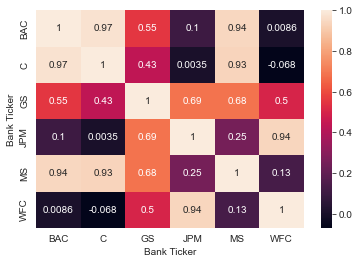

In [32]:
sns.heatmap(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True)

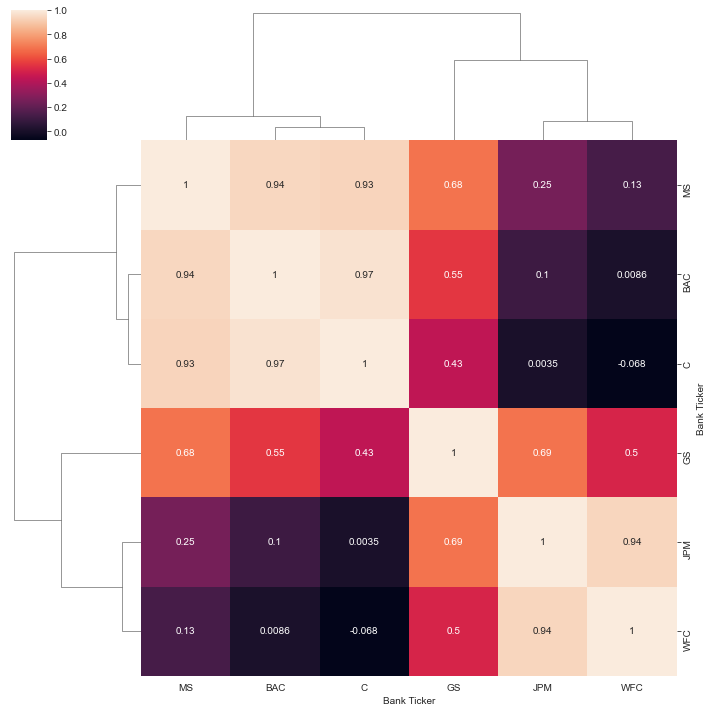

In [33]:
sns.clustermap(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True)

In [34]:
close_corr = bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr()

In [35]:
close_corr

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971514,0.550950,0.103896,0.944219,0.008567
C,0.971514,1.000000,0.434171,0.003540,0.933605,-0.068441
GS,0.550950,0.434171,1.000000,0.685280,0.683834,0.499901
JPM,0.103896,0.003540,0.685280,1.000000,0.250441,0.940279
MS,0.944219,0.933605,0.683834,0.250441,1.000000,0.131864
WFC,0.008567,-0.068441,0.499901,0.940279,0.131864,1.000000


In [36]:
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

In [37]:
bac15 = bank_stocks['BAC'].loc['2015-01-01' : '2016-01-01']
bac15.iplot(kind='candle')

In [38]:
bank_stocks['MS']['Close'].loc['2015-01-01' : '2016-01-01'].ta_plot(study = 'sma', periods = [13,21,55])

In [39]:
bank_stocks['BAC']['Close'].loc['2015-01-01' : '2016-01-01'].ta_plot(study = 'boll')